Encoding categorical variables - binary

Take a look at the hiking dataset. There are several columns here that need encoding, one of which is the Accessible column, which needs to be encoded in order to be modeled. Accessible is a binary feature, so it has two values - either Y or N - so it needs to be encoded into 1s and 0s. Use scikit-learn's LabelEncoder method to do that transformation.

1. Store LabelEncoder() in a variable named enc
2. Using the encoder's fit_transform() function, encode the hiking dataset's "Accessible" column. Call the new column Accessible_enc.
3. Compare the two columns side-by-side to see the encoding.



In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking["Accessible_enc"] = enc.fit_transform(hiking["Accessible"])

# Compare the two columns
print(hiking[["Accessible","Accessible_enc"]].head())

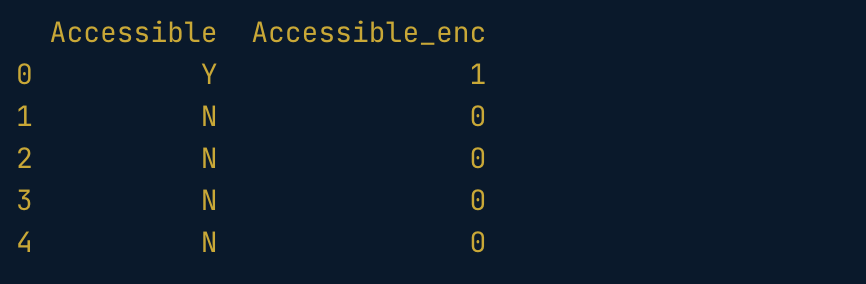

Encoding categorical variables - one-hot

One of the columns in the volunteer dataset, category_desc, gives category descriptions for the volunteer opportunities listed. Because it is a categorical variable with more than two categories, we need to use one-hot encoding to transform this column numerically. Use Pandas' get_dummies() function to do so.

1. Call get_dummies() on the volunteer["category_desc"] column to create the encoded columns and assign it to category_enc.
2. Print out the head() of the category_enc variable to take a look at the encoded columns.

In [ ]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer["category_desc"])

# Take a look at the encoded columns
print(category_enc.head())

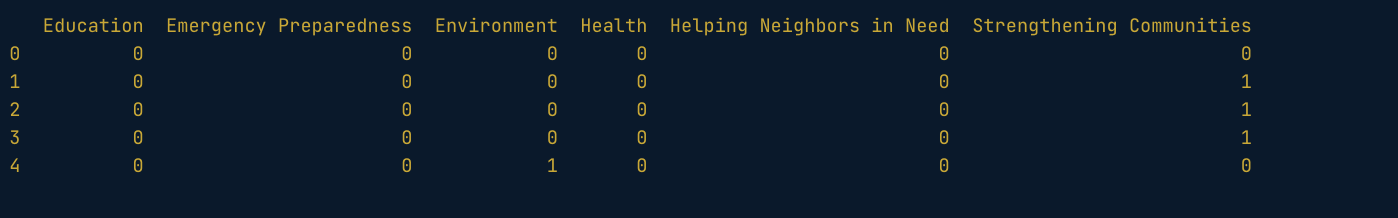

Engineering numerical features - taking an average

A good use case for taking an aggregate statistic to create a new feature is to take the mean of columns. Here, you have a DataFrame of running times named running_times_5k. For each name in the dataset, take the mean of their 5 run times.

1. Create a list of the columns you want to take the average of and store it in a variable named run_columns.
2. Use apply to take the mean() of the list of columns and remember to set axis=1. Use lambda row: in the apply.
3. Print out the DataFrame to see the mean column.

In [ ]:
# Create a list of the columns to average
run_columns = ['run1', 'run2', 'run3', 'run4', 'run5']
# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

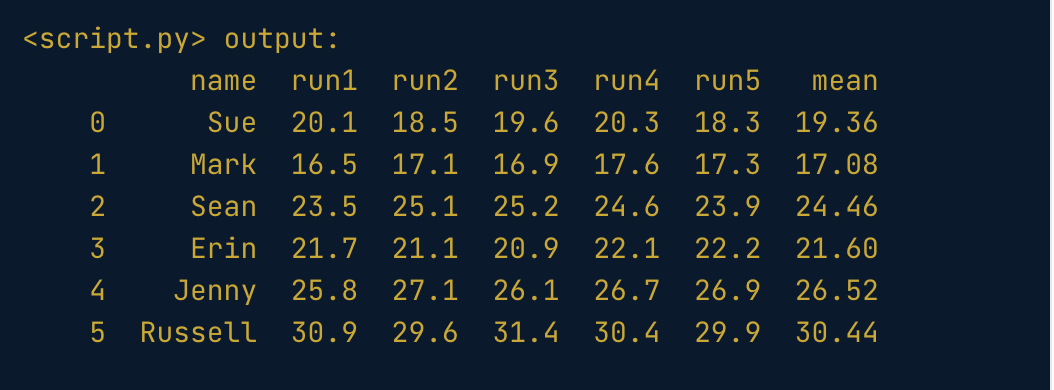

Engineering numerical features - datetime

There are several columns in the volunteer dataset comprised of datetimes. Let's take a look at the start_date_date column and extract just the month to use as a feature for modeling.

1. Use Pandas to_datetime() function on the volunteer["start_date_date"] column and store it in a new column called start_date_converted.
2. To retrieve just the month, apply a lambda function to volunteer["start_date_converted"] that grabs the .month attribute from the row. Store this in a new column called start_date_month.
3. Print the head() of just the start_date_converted and start_date_month columns.

In [ ]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

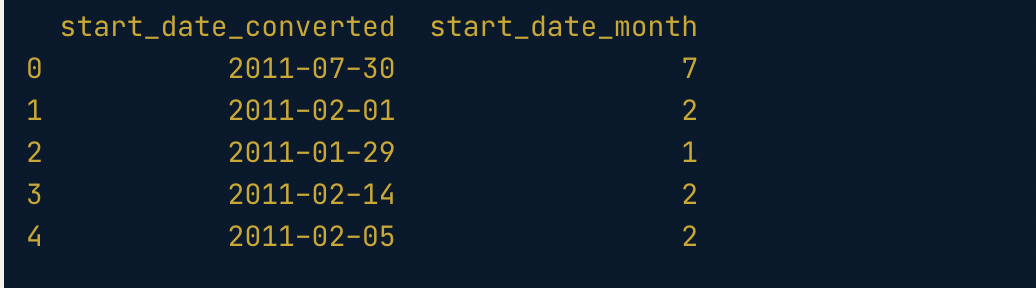

Engineering features from strings - extraction

The Length column in the hiking dataset is a column of strings, but contained in the column is the mileage for the hike. We're going to extract this mileage using regular expressions, and then use a lambda in Pandas to apply the extraction to the DataFrame.

1. Create a pattern that will extract numbers and decimals from text, using \d+ to get numbers and \. to get decimals, and pass it into re's compile function.
2. Use re's match function to search the text, passing in the pattern and the length text.
3. Use the matched mile's group() attribute to extract the matched pattern, making sure to match group 0, and pass it into float.
4. Apply the return_mileage() function to the hiking["Length"] column.

In [ ]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    
    # Search the text for matches
    mile = re.match(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking['Length_num'] = hiking['Length'].apply(lambda row: return_mileage(row))
print(hiking[["Length", "Length_num"]].head())

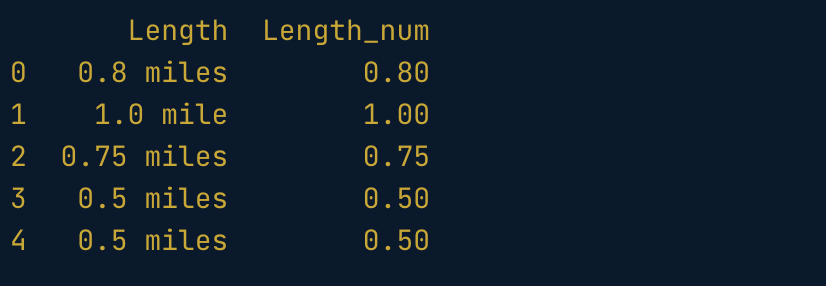

Engineering features from strings - tf/idf


Let's transform the volunteer dataset's title column into a text vector, to use in a prediction task in the next exercise.

1. Store the volunteer["title"] column in a variable named title_text.
2. Use the tfidf_vec vectorizer's fit_transform() function on title_text to transform the text into a tf-idf vector.

In [ ]:
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

Text classification using tf/idf vectors

Now that we've encoded the volunteer dataset's title column into tf/idf vectors, let's use those vectors to try to predict the category_desc column.


1. Using train_test_split, split the text_tfidf vector, along with your y variable, into training and test sets. Set the stratify parameter equal to y, since the class distribution is uneven. Notice that we have to run the toarray() method on the tf/idf vector, in order to get in it the proper format for scikit-learn.
2. Use Naive Bayes' fit() method on the X_train and y_train variables.
3. Print out the score() of the X_test and y_test variables.

In [ ]:
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train,y_train)

# Print out the model's accuracy
print(nb.score(X_test,y_test))

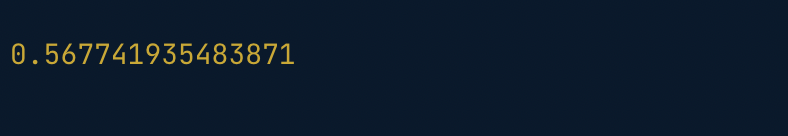

> Nice work! Notice that the model doesn't score very well. We'll work on selecting the best features for modeling in the next chapter.